In [1]:
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import pygraphviz as viz
import networkx as nx
import pandas as pd
import random
import numpy as np
from utils.draw import draw_graph, draw_partition, draw_partition2, draw_partition3

In [2]:
df = pd.read_csv('vk_links.csv')
df.head()

out_f           in_f
0   alisaborkova  anonskinonoch
1      tereshina  anonskinonoch
2         sinart  anonskinonoch
3  julietta.leks  anonskinonoch
4    irinalerman  anonskinonoch

In [3]:
G = nx.Graph()

In [4]:
for idx, row in df.iterrows():
    G.add_edge(row['out_f'], row['in_f'])

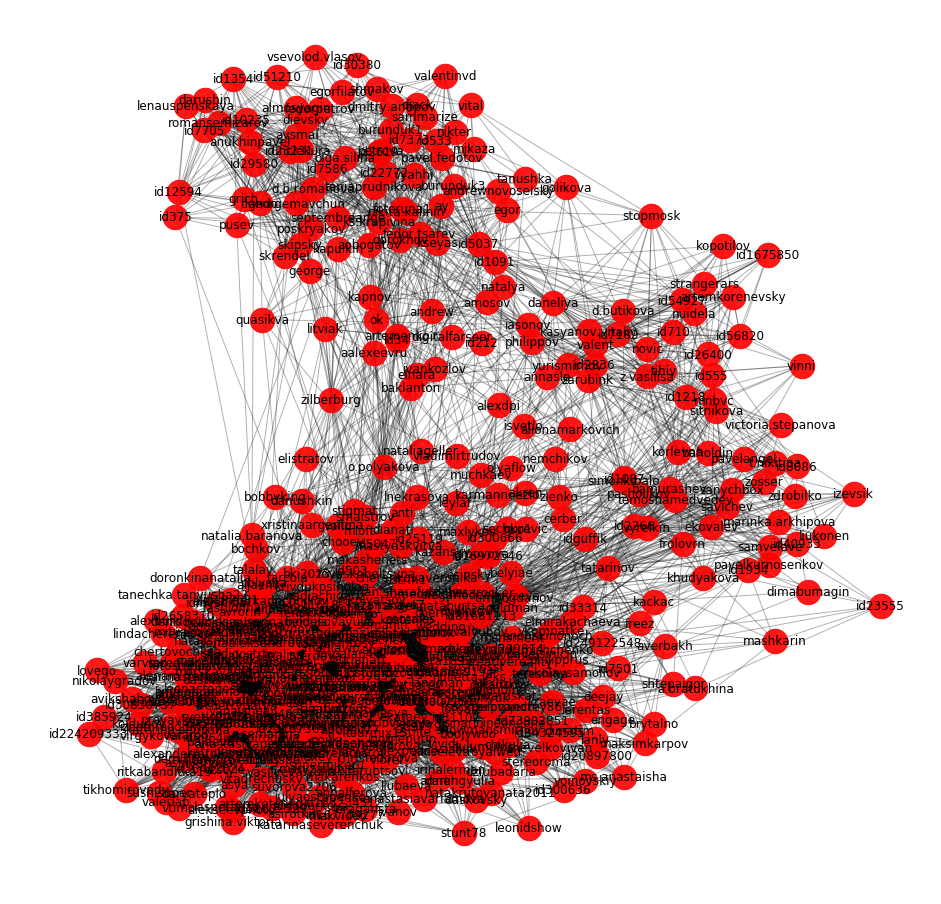

In [5]:
draw_graph(G)

## Best community partition

In [6]:
import community

partition = community.best_partition(G)

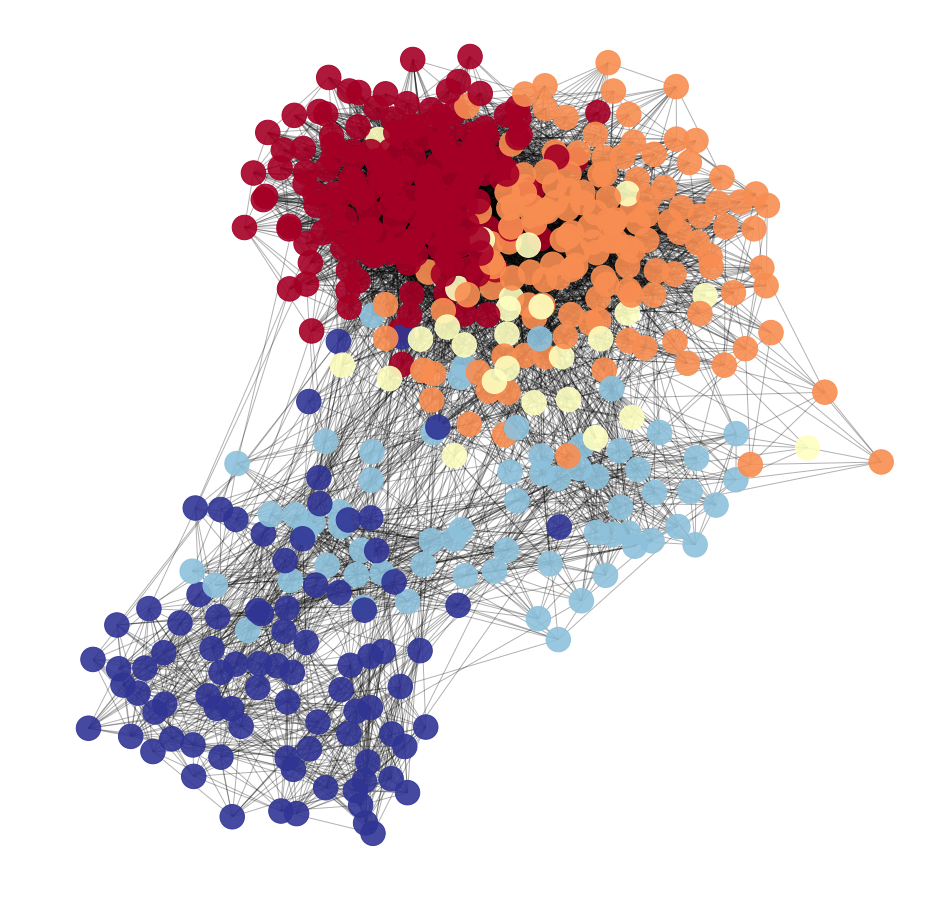

In [7]:
draw_partition2(G, partition)

## k-clique

In [8]:
from networkx.algorithms.community import k_clique_communities

In [9]:
def in_which(node, list_of_sets):
    idx = 0
    for s in list_of_sets:
        if node in s:
            return idx
        idx += 1

### k = 6

In [10]:
c = list(k_clique_communities(G, 5))
partition = [in_which(x, c) for x in list(G.nodes)]

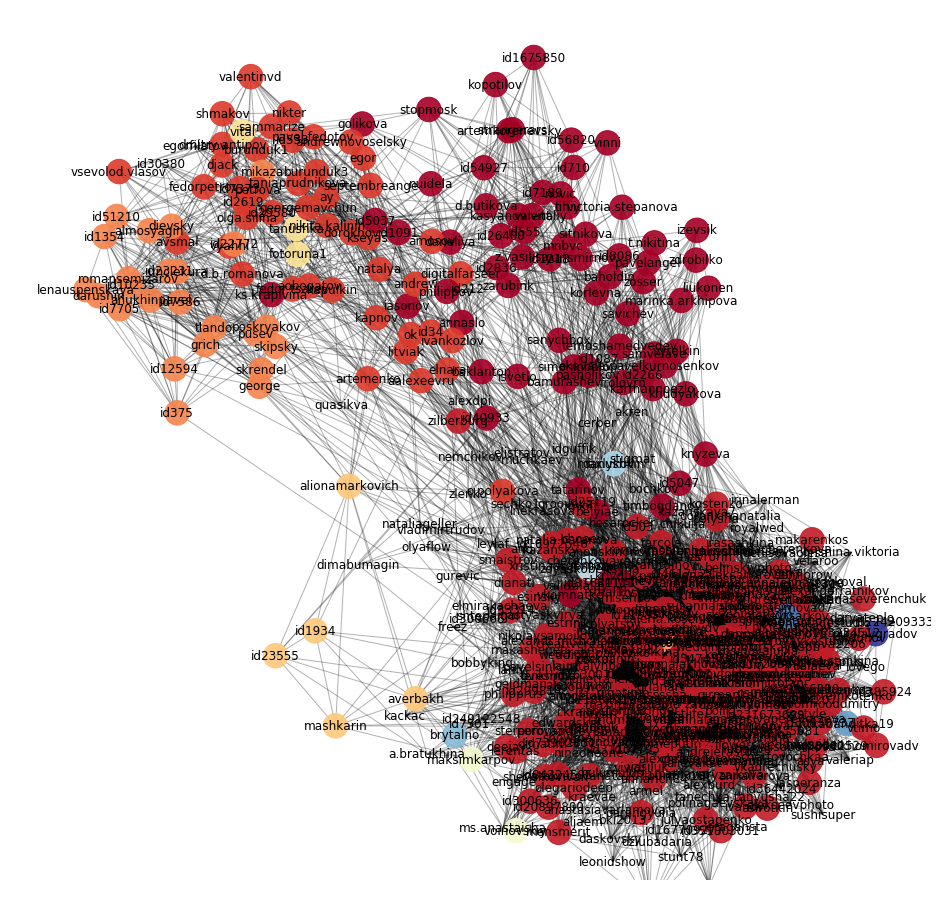

In [11]:
draw_partition3(G, partition)

## Finding leaders, agents and followers

### Методом обхода в ширину

Найдем роли пользователей в сообществе на примере одного из найденных сообществ

In [25]:
from collections import defaultdict, OrderedDict

In [26]:
partition = community.best_partition(G)
d = defaultdict(list)
for key, value in partition.items():
    d[value].append(key)

Возьмем первое найденное сообщество

In [27]:
first = G.subgraph(d[0]).copy()

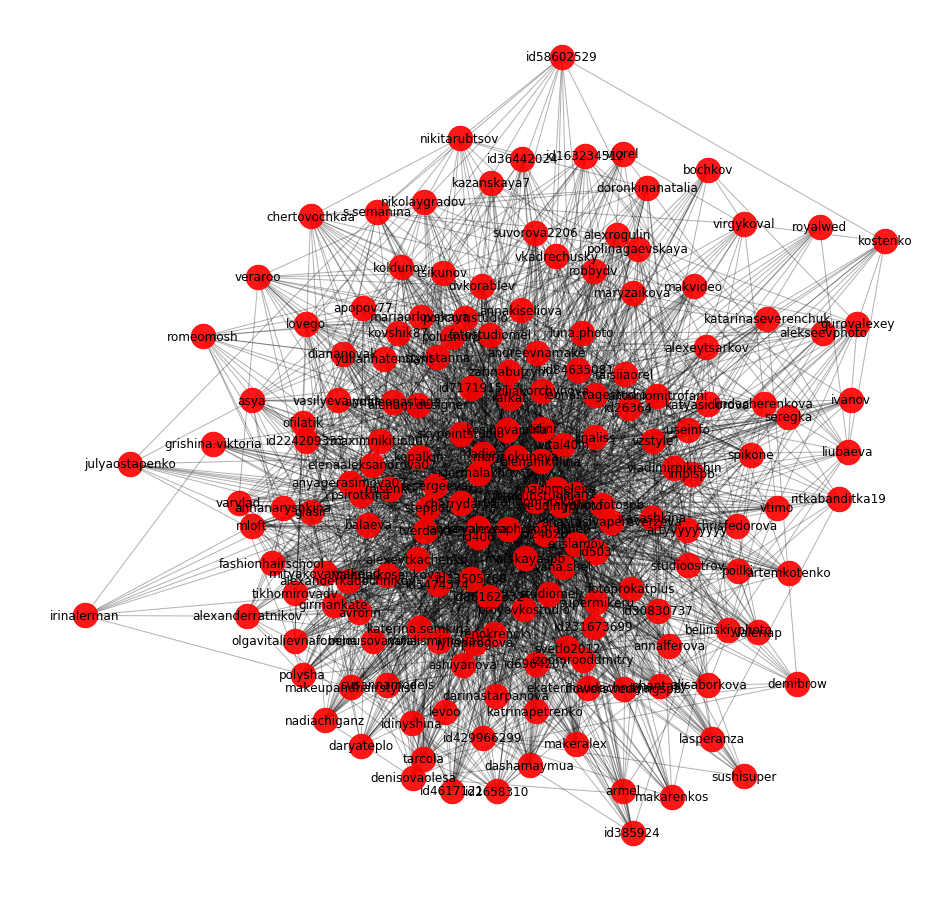

In [16]:
draw_graph(first)

#### Ранжировка пользователей

Проранжируем пользователей обходом в ширину от вершины и наивысшей степенью:
 - Вершина c наивысшей степенью получает ранг 0
 - Вершины посещенные на i-ой итерации получают ранг i

In [32]:
d = dict(zip(list(first.nodes), range(len(list(first.nodes)))))

In [33]:
rank = defaultdict(int)

In [34]:
import operator

leader = max(first.nodes, key=operator.itemgetter(1))
viewed = set([leader])
current_rank = 1
rank[d[leader]] = 0

while(True):
    current_leaders = set()
    for n in viewed:
        current_leaders.update(list(first.adj[n].keys()))
    current_leaders = current_leaders.difference(viewed)
    if len(current_leaders) == 0:
        break
    viewed = viewed.union(current_leaders)
    for leader in current_leaders:
        rank[d[leader]] = current_rank
    current_rank += 1
        

Визуализируем граф в соответствии с рангами пользователей

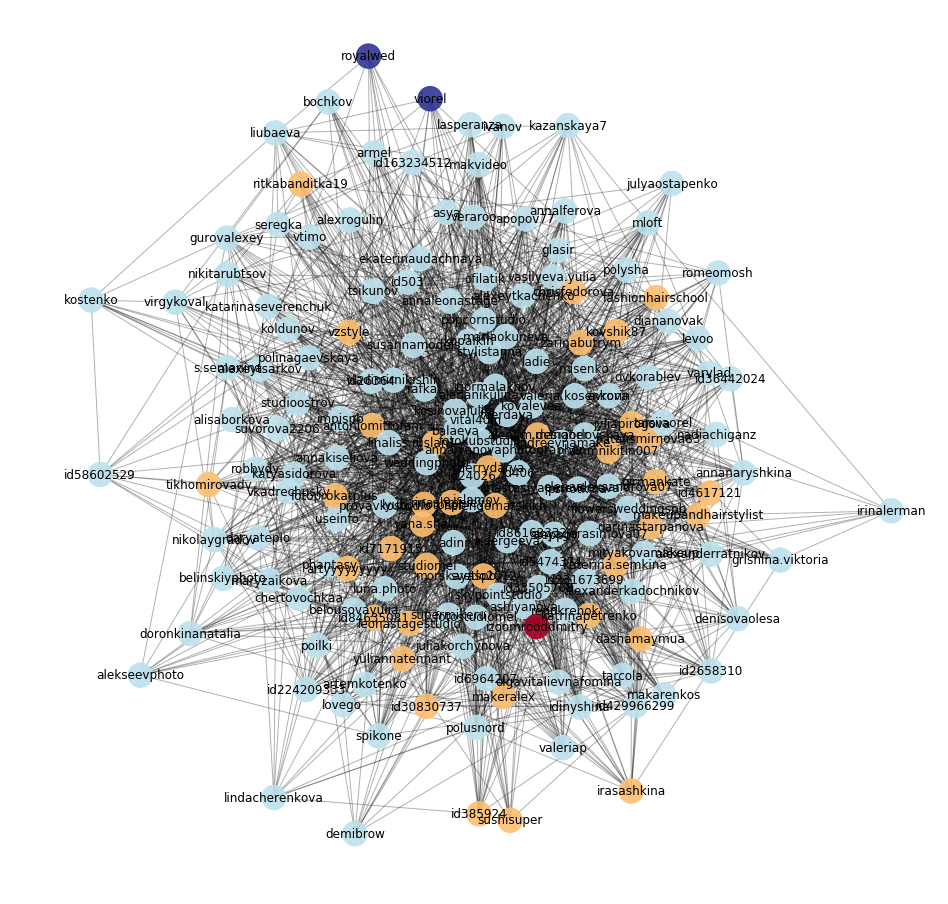

In [35]:
od = OrderedDict(sorted(rank.items()))
partition = list(od.values())
draw_partition3(first, partition)